<H1>Дашборды, выполненные в Tableau.</H1>

<u>Ссылки на дашборды:</u>

[дашборд-1](https://public.tableau.com/app/profile/weis.mingo/viz/Dashboardver_02/Dashboardver_01)
- Первый в базовом курсе Яндекс Практикума. Описание и действия по его созданию подробно описаны ниже.

[дашборд-2](https://public.tableau.com/app/profile/weis.mingo/viz/TED_16824099917970/Dashboard1)
- Более "продвинутый" дашборд. Посвящён анализу докладов некоммерческого фонда TED в разрезе регионов, времени проведения и топ-тем. В проекте собрано 5 файлов с данными (соединения union и логические). Визуализация карты позволяет отобрать в группу нужные страны и регионы, также применены сквозные фильтры топ-тем и времени докладов. Данные до 2001 года слишком малы и поэтому отсеяны на уровне источника.

### Описание проекта "дашборд-1".

Вы работаете аналитиком в Яндекс.Дзене. Почти всё ваше время занимает анализ пользовательского взаимодействия с карточками статей.
Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».

Каждую неделю начинающие менеджеры Денис и Валерия задают вам одни и те же вопросы: 
- Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?

На шестую неделю работы вы решаете, что процесс пора автоматизировать. Для Дениса и Валерии нужно сделать дашборд.

### ТЗ на дашборд.

Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;

- Состав данных для дашборда:
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
  - Дата и время;
  - Тема карточки;
  - Тема источника;
  - Возрастная группа;
- Характер данных:
  - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
  - Разбивка событий по темам источников — относительные величины (% событий);
  - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: дата-инженеры обещали подготовить для вас агрегирующую таблицу dash_visits. Вот её структура:
  - record_id — первичный ключ,
  - item_topic — тема карточки,
  - source_topic — тема источника,
  - age_segment — возрастной сегмент,
  - dt — дата и время,
  - visits — количество событий.
- Частота обновления данных: один раз в сутки, в полночь по UTC.

### Макет дашборда.

Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде:

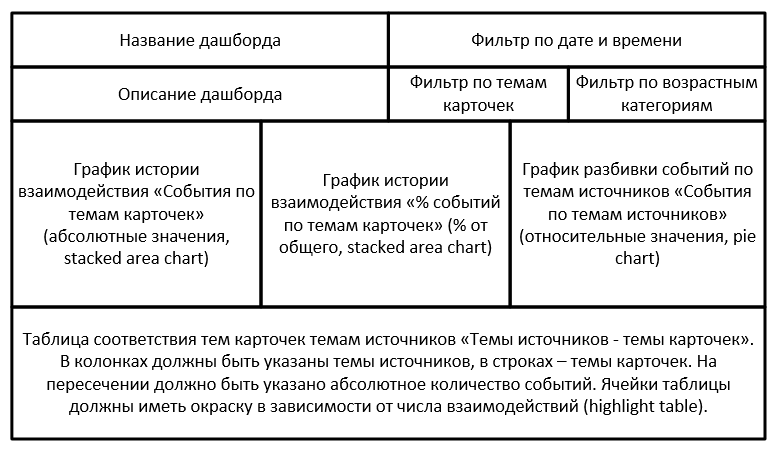

### Создание связи с БД-источником данных, сохранение данных локально.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'xxxxxxxxxxxxx', # имя пользователя
            'pwd': 'xxxxxxxxxxxxx', # пароль
            'host': 'xxxxxxxxxxxxx.xxx.xxx.net',
            'port': 8888, # порт подключения
            'db': 'xxxxxxxxxxxxx-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) # агрегированный канал связи с БД

In [2]:
# SQL-запрос на вычитку всех колонок и строк из базы данных (БД)
query = '''
           SELECT *
           FROM dash_visits
        '''

In [3]:
# считывание данных и передача их в датафрейм
dash_visits = pd.io.sql.read_sql(query, con = engine) 

In [4]:
dash_visits.head() # первые 5 строк датафрейма

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [5]:
dash_visits.info() # информация по колонкам, типам и пр.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
dash_visits.to_csv('dash_visits.csv', index=False) # сохраняем датафрейм в csv-файл

### Дашборд как результат работы скрипта.

- Файл dash_visits.csv появился в каталоге рядом с тетрадью. 
- После перехода на сайт tableau.com были подгружены данные из этого файла, построены необходимые графики и таблицы, на финальном этапе собранные в [дашборд](https://public.tableau.com/app/profile/weis.mingo/viz/Dashboardver_02/Dashboardver_01). 
- Работа [дашборда](https://public.tableau.com/app/profile/weis.mingo/viz/Dashboardver_02/Dashboardver_01) представлена на скриншоте ниже (фильтры времени, тем и возрастов взаимодействуют со всеми 4-мя областями данных). 

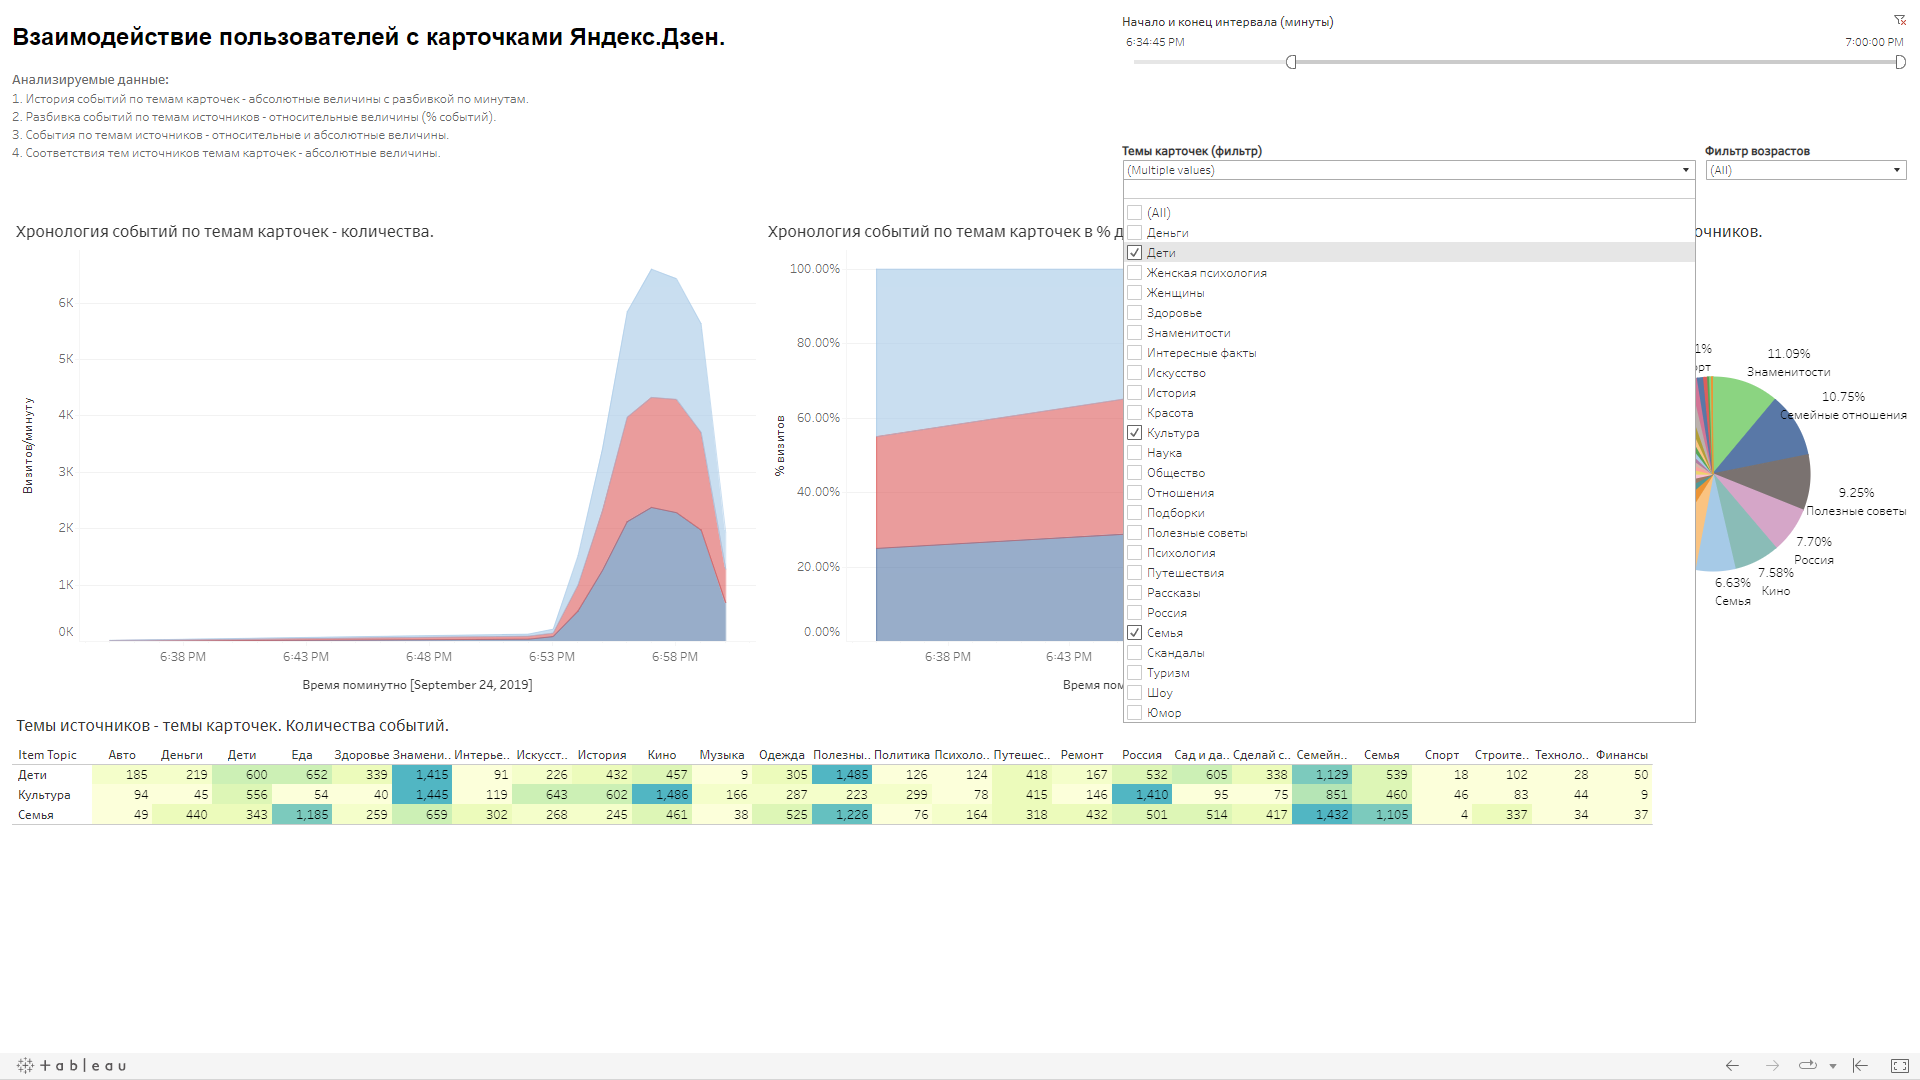

### Ответы на вопросы с использованием дашборда.

- Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?

Для ответа на этот вопрос построим новую диаграмму PieChart в разрезе данных item_topic (темы карточек).


Наибольшее количество взаимодействий у карточек с темой Наука (21670 за период наблюдений), Отношения (20615) и Интересные факты (19886). Меньше всего взаимодействий по карточкам Женская психология, Шоу и Знаменитости.

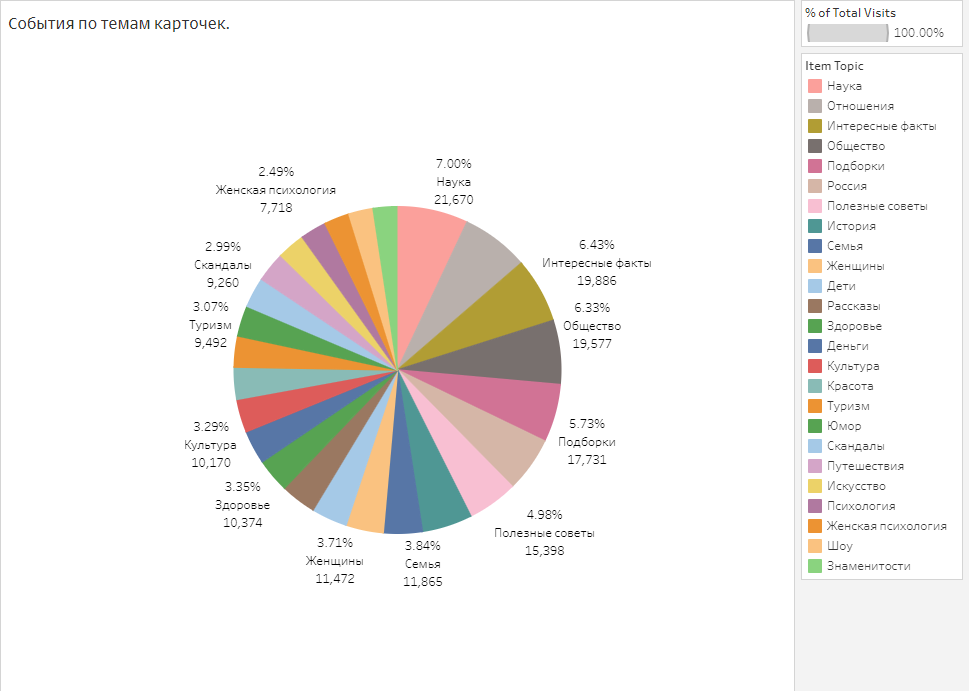

- Как много карточек генерируют источники с разными темами?

Как видно из таблицы, больше всего переходов с темы Путешествия на Рассказы (4565), Россия - Общество (3456) и Кино - Наука (3268).
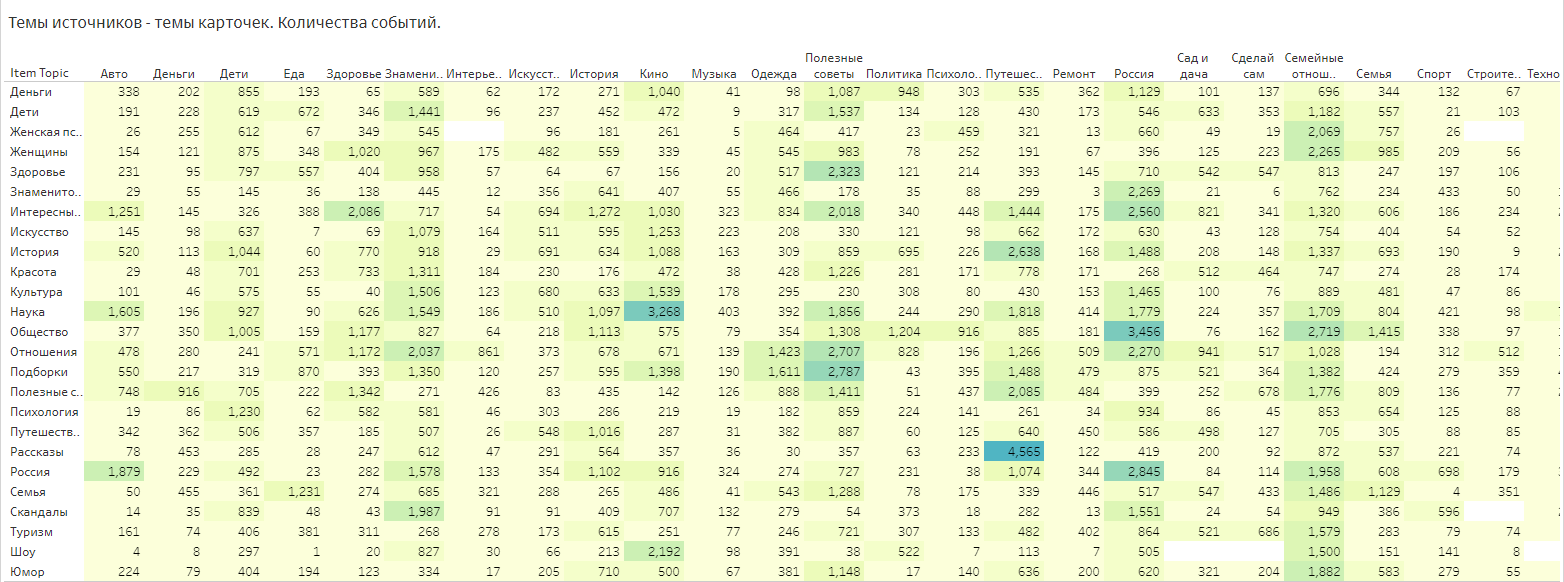

- Как соотносятся темы карточек и темы источников?

In [7]:
topics = set(dash_visits.item_topic)      # темы карточек
sources = set(dash_visits.source_topic)   # темы источников
cross = topics & sources                  # пересекеающиеся темы
print(f'Количество тем карточек - {len(topics)}', 
      f'\nКоличество тем источников - {len(sources)}\n{len(cross)} тем, входящих в оба списка:\n{cross}')

Количество тем карточек - 25 
Количество тем источников - 26
11 тем, входящих в оба списка:
{'Семья', 'Здоровье', 'Деньги', 'Россия', 'Дети', 'Психология', 'Знаменитости', 'Искусство', 'Путешествия', 'Полезные советы', 'История'}
